## activation function

### 1. 계단 함수

In [3]:
# numpy도 지원하는 step function

def step_fuction(x):
    y = x > 0 #true or false
    return y.astype(np.int) # true >> 1, false >> 0

    

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def step_function(x):
    return np.array(x > 0, dtype=int)

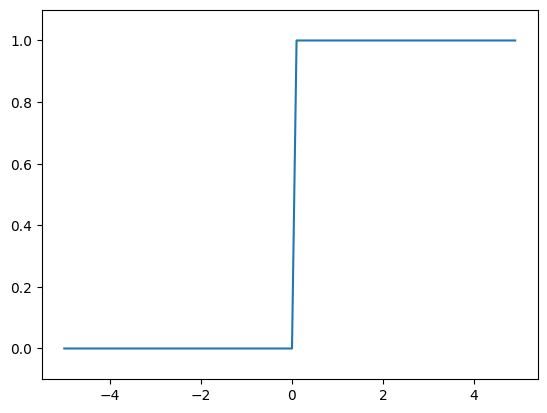

In [5]:

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

### 2. 시그모이드 함수

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(x))


In [7]:
x = np.array([-1.0, 1.0, 2.0])

sigmoid(x)

array([0.73105858, 0.26894142, 0.11920292])

### 3. ReLu

In [8]:
def relu(x):
    return np.maximum(0, x) # maximum(a,b) : a.b중 큰 값 반환



## 다차원 배열의 계산

In [9]:
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [10]:
np.ndim(A)

1

In [11]:
A.shape #TUPLE 반환

(4,)

In [12]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [13]:
np.ndim(B)

2

In [14]:
B.shape

(3, 2)

In [15]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

print(A@B)
print(np.dot(A,B)) 

# 주의 A@B와 B@A는 다를 수 있다
print(B@A)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[23 34]
 [31 46]]


In [16]:
X = np.array([1,2])

W = np.array([[1, 3, 5], [2,4,6]])

Y = np.dot(X,W)
print(Y)

[ 5 11 17]


In [17]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])
A1 = X@W1 + b1

Z1 = sigmoid(A1)

In [18]:
W2 = np.array([[0.1, 0.3], [0.5, 0.2], [0.4, 0.6]])
b2 = np.array([0.1, 0.2])

A2 = Z1@W2 + b2

Z2 = sigmoid(A2)

In [19]:
# 활성화 함수로 항등함수
def indentity_function(x):
    return x

In [21]:
W3 = np.array([[0.1, 0.3], [0.4, 0.6]])
b3 = np.array([0.1, 0.2])

A3 = Z2@W3 + b3

Z3 = indentity_function(A3)

### 구현 정리

In [23]:
def init_network(): # W,B 초기화 및 저장 함수
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = indentity_function(a3)

    return y

network = init_network()
x = np.array([[1.0, 0.5]])
y = forward(network, x)

print(y)

[[0.20993715 0.46282556]]


### softmax
- 다중 분류의 활성화함수
- 출력은 0~1.0 사이 실수
- 출력 전체 합이 1이됨

```Python
# 기존 코드: overflow 발생 가능
def softmax(a):
    exp_a = np.exp(a) # a 대신 a - max(a)를 대입해 오버플로 방지
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

```

In [24]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a


## 완전 연결 계층에 의한 변환의 미니배치 버전

In [12]:
import numpy as np

W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
h = np.matmul(x, W1) + b1

def sigmoid(x):
    return 1/(1+np.exp(-x))

sigmoid(h) # 비선형 함수 시그모이드 함수를 활용한 비선형 변환

array([[0.75317762, 0.80655869, 0.21922881, 0.55715542],
       [0.70879328, 0.15838822, 0.81288684, 0.12827099],
       [0.94713397, 0.24249126, 0.70427631, 0.77506647],
       [0.87335792, 0.38239219, 0.58707774, 0.56634211],
       [0.68031601, 0.76806843, 0.26049166, 0.39677756],
       [0.70504691, 0.45315704, 0.5416034 , 0.25554836],
       [0.89489186, 0.87140579, 0.1460307 , 0.8782311 ],
       [0.88982767, 0.77442651, 0.23781425, 0.81762914],
       [0.45514887, 0.6569339 , 0.37777903, 0.11182853],
       [0.81055734, 0.8111463 , 0.21099113, 0.67438965]])

## matmul(x, w1)과 dot(x, w1)

matmul(x, w1)과 dot(x, w1) 모두 파라미터 순서가 중요하다.

그런데 두 코드를 계산했을 때 계산 값이 다르다.

두 함수의 차이가 뭘까?